In [63]:
import geopandas as gpd
from geocube.api.core import make_geocube
import pystac_client
import stackstac
import matplotlib.pyplot as plt
import planetary_computer
import numpy as np

In [3]:

# Load the shapefile
shapefile = gpd.read_file('../../2_data/Koumbia_db/Koumbia_JECAM_2018-20-21.shp')


In [64]:
len(shapefile)

998

In [65]:
shapefile['polygon_ID'] = np.arange(0,len(shapefile),1)

In [72]:

shapefile.rename(columns = {'CodeL2':'c2018', '20_CodeL2':'c2020','21_CodeL2':'c2021'}, inplace = True)
shapefile = shapefile[['c2018', 'c2020', 'c2021', 'polygon_ID', 'geometry']]

In [82]:
list(shapefile.columns[:-1])

['c2018', 'c2020', 'c2021', 'polygon_ID']

In [76]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In [73]:
shapefile

,c2018,c2020,c2021,polygon_ID,geometry
0,3,3,1,0,"POLYGON ((431889.558 1245720.838, 431871.894 1..."
1,2,1,2,1,"POLYGON ((431889.901 1245882.343, 431890.029 1..."
2,1,1,3,2,"POLYGON ((431943.361 1245757.542, 431943.315 1..."
3,1,1,2,3,"POLYGON ((431970.907 1245894.094, 431954.661 1..."
4,2,2,1,4,"POLYGON ((432089.474 1245775.019, 432082.715 1..."
...,...,...,...,...,...
993,6,6,5,993,"POLYGON ((431292.702 1245599.738, 431357.026 1..."
994,6,3,3,994,"POLYGON ((431430.044 1245648.593, 431487.628 1..."
995,1,1,3,995,"POLYGON ((431465.756 1245735.261, 431466.408 1..."
996,1,3,1,996,"POLYGON ((431467.224 1245764.784, 431467.224 1..."


In [ ]:
shapefile.rename()

In [66]:
shapefile

,CodeL2,20_CodeL2,21_CodeL2,ClassL2,20_ClassL2,21_ClassL2,geometry,polygon_ID
0,3,3,1,Oleaginous/Leguminous,Oleaginous/Leguminous,Cereals,"POLYGON ((431889.558 1245720.838, 431871.894 1...",0
1,2,1,2,Cotton,Cereals,Cotton,"POLYGON ((431889.901 1245882.343, 431890.029 1...",1
2,1,1,3,Cereals,Cereals,Oleaginous/Leguminous,"POLYGON ((431943.361 1245757.542, 431943.315 1...",2
3,1,1,2,Cereals,Cereals,Cotton,"POLYGON ((431970.907 1245894.094, 431954.661 1...",3
4,2,2,1,Cotton,Cotton,Cereals,"POLYGON ((432089.474 1245775.019, 432082.715 1...",4
...,...,...,...,...,...,...,...,...
993,6,6,5,Forest,Forest,Shrubland,"POLYGON ((431292.702 1245599.738, 431357.026 1...",993
994,6,3,3,Forest,Oleaginous/Leguminous,Oleaginous/Leguminous,"POLYGON ((431430.044 1245648.593, 431487.628 1...",994
995,1,1,3,Cereals,Cereals,Oleaginous/Leguminous,"POLYGON ((431465.756 1245735.261, 431466.408 1...",995
996,1,3,1,Cereals,Oleaginous/Leguminous,Cereals,"POLYGON ((431467.224 1245764.784, 431467.224 1...",996


In [4]:
aoi = gpd.read_file('../../2_data/Koumbia_db/Koumbia_JECAM_2018-20-21.shp')
aoi_4326 = aoi.to_crs('EPSG: 4326')
bbox = aoi_4326.total_bounds
bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
year = ['2018', '2020', '2021']

In [6]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
    )

In [7]:
s2_search_2018 = catalog.search(
        collections=["sentinel-2-l2a"],
        bbox= bbox,
        datetime= year[2] + '-01-01/' + year[2] + '-01-06',
        query={
                #'eo:cloud_cover': {"lt": 100}, 
                's2:nodata_pixel_percentage': {'lt': 50},
                's2:mgrs_tile': {'eq': '30PVT'}},
        )
item2018 = s2_search_2018.item_collection()

In [56]:
petite_bbox = [415000, 1240000, 415000+1000, 1240000+1000]
stack = stackstac.stack(item2018, resolution = 10, bounds = petite_bbox, assets=['B02'])

In [57]:
stack

<xarray.DataArray 'stackstac-945898aecf0bd852a691a4d99c535e3b' (time: 1,
                                                                band: 1,
                                                                y: 100, x: 100)>
dask.array<fetch_raster_window, shape=(1, 1, 100, 100), dtype=float64, chunksize=(1, 1, 100, 100), chunktype=numpy.ndarray>
Coordinates: (12/46)
  * time                                     (time) datetime64[ns] 2021-01-04...
    id                                       (time) <U54 'S2B_MSIL2A_20210104...
  * band                                     (band) <U3 'B02'
  * x                                        (x) float64 4.15e+05 ... 4.16e+05
  * y                                        (y) float64 1.241e+06 ... 1.24e+06
    s2:vegetation_percentage                 float64 1.712
    ...                                       ...
    title                                    <U19 'Band 2 - Blue - 10m'
    proj:shape                               object {10980}
    common_name                              <U4 'blue'
    center_wavelength                        float64 0.49
    full_width_half_max                      float64 0.098
    epsg                                     int64 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(415000, 1240000, 416000, 1241...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 415000.00|\n| 0.00,-10.00, 1241000.00|\n| 0.0...
    resolution:  10

In [74]:
out_grid = make_geocube(
    vector_data=shapefile,
    like = stack,
)

In [75]:
out_grid

<xarray.Dataset>
Dimensions:      (y: 100, x: 100)
Coordinates:
  * y            (y) float64 1.241e+06 1.241e+06 1.241e+06 ... 1.24e+06 1.24e+06
  * x            (x) float64 4.15e+05 4.15e+05 4.15e+05 ... 4.16e+05 4.16e+05
    spatial_ref  int64 0
Data variables:
    c2018        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    c2020        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    c2021        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    polygon_ID   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

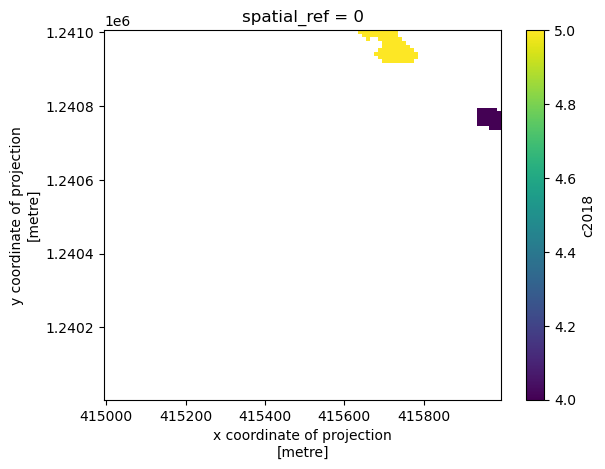

In [86]:
out_grid['c2018'].plot()

In [87]:
out_grid

<xarray.Dataset>
Dimensions:      (y: 100, x: 100)
Coordinates:
  * y            (y) float64 1.241e+06 1.241e+06 1.241e+06 ... 1.24e+06 1.24e+06
  * x            (x) float64 4.15e+05 4.15e+05 4.15e+05 ... 4.16e+05 4.16e+05
    spatial_ref  int64 0
Data variables:
    c2018        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    c2020        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    c2021        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    polygon_ID   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [88]:
out_grid_int16 = out_grid.astype(np.uint16)

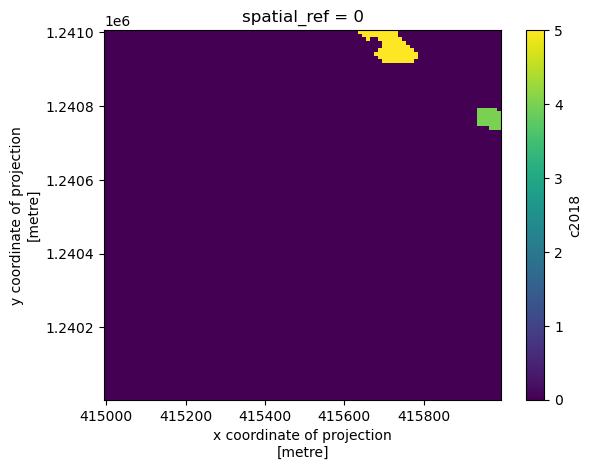

In [89]:
out_grid_int16['c2018'].plot()

In [69]:
out_grid['polygon_ID'].rio.to_raster("./testimages/gtID_uin16.tif")